<a href="https://colab.research.google.com/github/soniajoseph/ExcaliburML/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Sigmoid function
def sigmoid(z):
  return 1 / (1+np.exp(-z))

# Cost function
def cost(theta, pred, Y):
  error = (-Y * np.log(pred)) - ((1-Y)*np.log(1-pred))
  return 1/len(Y) * sum(error)

def logistic_regression_fit(Xtrain, Ytrain, alpha=.0001, iterations=1000, verbose=True):
  # Add bias
  Xtrain = np.hstack((np.ones((Xtrain.shape[0],1)), Xtrain))
  m = len(Ytrain)

  # Initialize weights
  theta = .1 * np.ones((Xtrain.shape[1],1))

  cost_history = []
  for i in range(iterations):
    if verbose and i % 50 == 0:
      print("On interation ", i)
    # Compute sigmoid
    sig = sigmoid(Xtrain@theta)
    c = cost(theta, sig, Ytrain)
    cost_history.append(c)
    # Calculate gradient
    grad = (1/m) * Xtrain.T @ (sig - Ytrain)
    # Update weights
    theta -= alpha * grad
  return theta, cost_history

def logistic_regression_predict(weights, Xtest,threshold=0.5):
  # Add bias
  Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))
  prob = sigmoid(Xtest@weights)
  return prob 

def logistic_regression_accuracy(prob, y, threshold=.5):
  corr = prob > threshold
  return sum(corr==y)/len(y)


In [0]:
df = pd.read_csv("sample_data/mnist_train_small.csv")

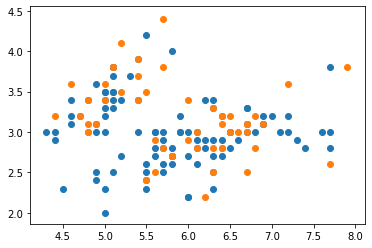

In [0]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
y = y.reshape(-1,1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(Xtrain[:,0], Xtrain[:,1])
plt.scatter(Xtest[:,0], Xtest[:,1])

On interation  0
On interation  50
On interation  100
On interation  150
On interation  200
On interation  250
On interation  300
On interation  350
On interation  400
On interation  450
On interation  500
On interation  550
On interation  600
On interation  650
On interation  700
On interation  750
On interation  800
On interation  850
On interation  900
On interation  950
On interation  1000
On interation  1050
On interation  1100
On interation  1150
On interation  1200
On interation  1250
On interation  1300
On interation  1350
On interation  1400
On interation  1450
On interation  1500
On interation  1550
On interation  1600
On interation  1650
On interation  1700
On interation  1750
On interation  1800
On interation  1850
On interation  1900
On interation  1950
On interation  2000
On interation  2050
On interation  2100
On interation  2150
On interation  2200
On interation  2250
On interation  2300
On interation  2350
On interation  2400
On interation  2450


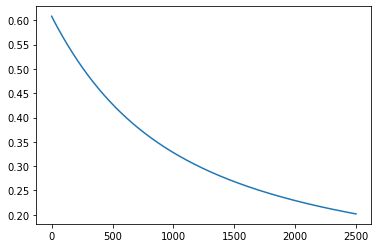

In [7]:
w, cost_history = logistic_regression_fit(Xtrain, Ytrain, alpha=.01, iterations=2500)
plt.plot(cost_history)

In [0]:
prob = logistic_regression_predict(w, Xtest)
acc = logistic_regression_accuracy(prob, Ytest)
print(acc)

[1.]
